In [2]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pickle

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Resources/heart_2020_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
num_columns = ['BMI', 'PhysicalHealth','MentalHealth','SleepTime','AgeCategory']

In [7]:
heart_disease = df.HeartDisease.apply(lambda x: 1 if x == "Yes" else 0)
num_feats = df.loc[:,num_columns]
cat_feats = df.loc[:,['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']]
cat_feats.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No


In [8]:
num_feats.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory
0,16.60,3.0,30.0,5.0,55-59
1,20.34,0.0,0.0,7.0,80 or older
2,26.58,20.0,30.0,8.0,65-69
3,24.21,0.0,0.0,6.0,75-79
4,23.71,28.0,0.0,8.0,40-44


In [9]:
cat_feats.Smoking = cat_feats.Smoking.apply(lambda x: 1 if x == "Yes" else 0)
cat_feats.AlcoholDrinking = cat_feats.AlcoholDrinking.apply(lambda x: 1 if x == "Yes" else 0)
cat_feats.Stroke = cat_feats.Stroke.apply(lambda x: 1 if x == "Yes" else 0)
cat_feats.DiffWalking = cat_feats.DiffWalking.apply(lambda x: 1 if x == "Yes" else 0)
cat_feats.Sex = cat_feats.Sex.apply(lambda x: 1 if x == "Male" else 0)
cat_feats.Diabetic = cat_feats.Diabetic.apply(lambda x: 1 if x == "Yes" else 0)
cat_feats.PhysicalActivity = cat_feats.PhysicalActivity.apply(lambda x: 1 if x == "Yes" else 0)
cat_feats.Asthma = cat_feats.Asthma.apply(lambda x: 1 if x == "Yes" else 0)
cat_feats.KidneyDisease = cat_feats.KidneyDisease.apply(lambda x: 1 if x == "Yes" else 0)
cat_feats.SkinCancer = cat_feats.SkinCancer.apply(lambda x: 1 if x == "Yes" else 0)

In [10]:
cat_feats.Race.replace({
    "White": 0,
    "Hispanic": 1,
    "Black": 2,
    "Other": 3,
    "Asian": 4,
    "American Indian/Alaskan Native":5}, inplace=True)

In [11]:
cat_feats.GenHealth.replace({
    "Excellent": 0,
    "Very good": 1,
    "Good": 2,
    "Fair": 3,
    "Poor": 4}, inplace=True)

In [12]:
num_feats.AgeCategory.replace({
    "18-24": 21,
    "25-29": 27,
    "30-34": 32,
    "35-39": 37,
    "40-44": 42,
    "45-49": 47,
    "50-54": 52,
    "55-59": 57,
    "60-64": 62,
    "65-69": 67,
    "70-74": 72,
    "75-79": 77,
    "80 or older":83}, inplace=True) # 83 Is chosen beacuse from census data available on census.gov for 2020 83 is the median age for this age group

In [13]:
# initialize
scaler = StandardScaler()

# fit
scaler.fit(num_feats)

# predict/transform
scaled_data = scaler.transform(num_feats)
df_scaled = pd.DataFrame(scaled_data, columns=num_columns)

df_scaled.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory
0,-1.844750,-0.046751,3.281069,-1.460354,0.133848
1,-1.256338,-0.424070,-0.490039,-0.067601,1.573277
2,-0.274603,2.091388,3.281069,0.628776,0.687474
3,-0.647473,-0.424070,-0.490039,-0.763977,1.241101
4,-0.726138,3.097572,-0.490039,0.628776,-0.696591


In [15]:
df_final = pd.concat([heart_disease, df_scaled, cat_feats], axis=1)
df_final.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,-1.844750,-0.046751,3.281069,-1.460354,0.133848,1,0,0,0,0,0,1,1,1,1,0,1
1,0,-1.256338,-0.424070,-0.490039,-0.067601,1.573277,0,0,1,0,0,0,0,1,1,0,0,0
2,0,-0.274603,2.091388,3.281069,0.628776,0.687474,1,0,0,0,1,0,1,1,3,1,0,0
3,0,-0.647473,-0.424070,-0.490039,-0.763977,1.241101,0,0,0,0,0,0,0,0,2,0,0,1
4,0,-0.726138,3.097572,-0.490039,0.628776,-0.696591,0,0,0,1,0,0,0,1,1,0,0,0


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   PhysicalHealth    319795 non-null  float64
 3   MentalHealth      319795 non-null  float64
 4   SleepTime         319795 non-null  float64
 5   AgeCategory       319795 non-null  float64
 6   Smoking           319795 non-null  int64  
 7   AlcoholDrinking   319795 non-null  int64  
 8   Stroke            319795 non-null  int64  
 9   DiffWalking       319795 non-null  int64  
 10  Sex               319795 non-null  int64  
 11  Race              319795 non-null  int64  
 12  Diabetic          319795 non-null  int64  
 13  PhysicalActivity  319795 non-null  int64  
 14  GenHealth         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [17]:
X = df_final.drop(columns=["HeartDisease"])
y = df_final.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(239846, 17) (79949, 17)


In [18]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[217373   1943]
 [ 18301   2229]]
    
    AUC: 0.8402403355881201

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.99      0.96    219316
           1       0.53      0.11      0.18     20530

    accuracy                           0.92    239846
   macro avg       0.73      0.55      0.57    239846
weighted avg       0.89      0.92      0.89    239846

    
TEST METRICS
    Confusion Matrix: 
    [[72460   646]
 [ 6063   780]]
    
    AUC: 0.8416590443966827

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.55      0.11      0.19      6843

    accuracy                           0.92     79949
   macro avg       0.73      0.55      0.57     79949
weighted avg       0.89      0.92      0.89     79949

    


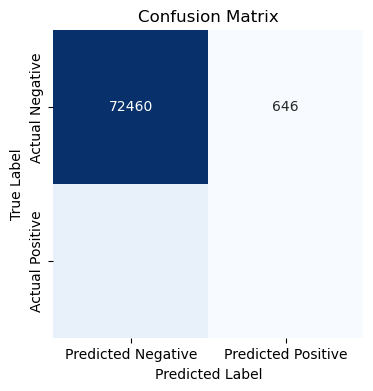

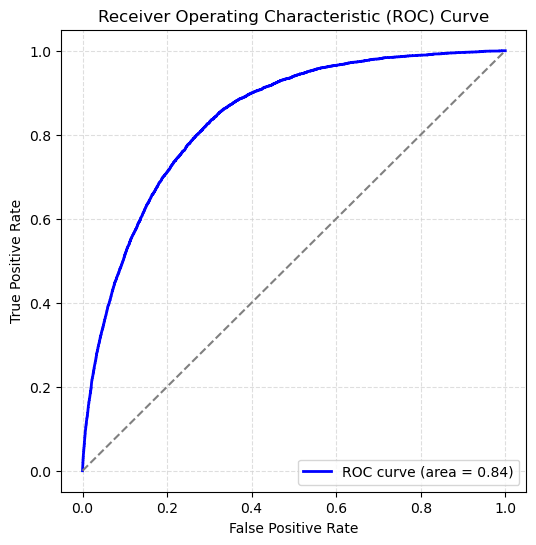

In [19]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[219297     19]
 [   728  19802]]
    
    AUC: 0.9999303611333352

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00    219316
           1       1.00      0.96      0.98     20530

    accuracy                           1.00    239846
   macro avg       1.00      0.98      0.99    239846
weighted avg       1.00      1.00      1.00    239846

    
TEST METRICS
    Confusion Matrix: 
    [[67467  5639]
 [ 5129  1714]]
    
    AUC: 0.5871016009899311

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.92      0.93     73106
           1       0.23      0.25      0.24      6843

    accuracy                           0.87     79949
   macro avg       0.58      0.59      0.58     79949
weighted avg       0.87      0.87      0.87     79949

    


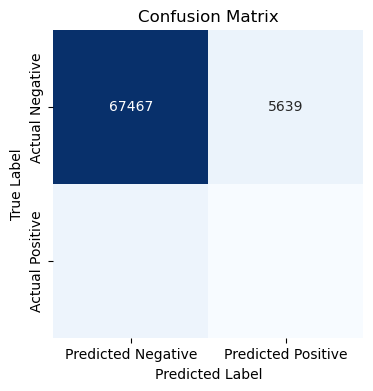

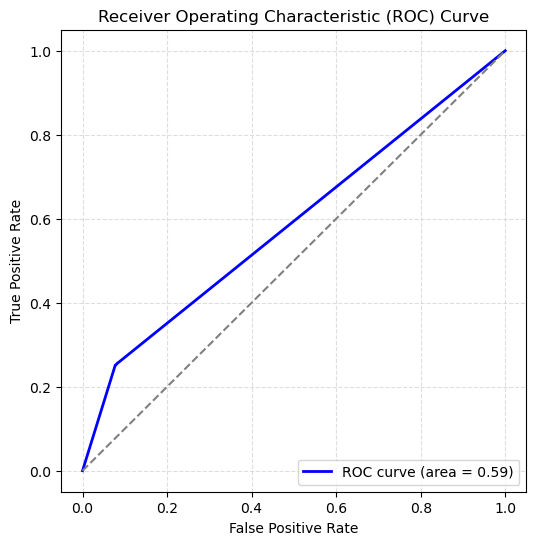

In [32]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=30)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[219234     82]
 [   672  19858]]
    
    AUC: 0.9998264646251667

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00    219316
           1       1.00      0.97      0.98     20530

    accuracy                           1.00    239846
   macro avg       1.00      0.98      0.99    239846
weighted avg       1.00      1.00      1.00    239846

    
TEST METRICS
    Confusion Matrix: 
    [[71640  1466]
 [ 6030   813]]
    
    AUC: 0.7937862285204017

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.98      0.95     73106
           1       0.36      0.12      0.18      6843

    accuracy                           0.91     79949
   macro avg       0.64      0.55      0.56     79949
weighted avg       0.87      0.91      0.88     79949

    


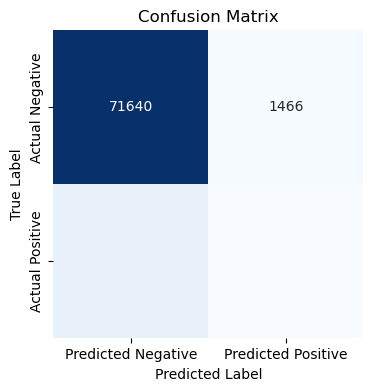

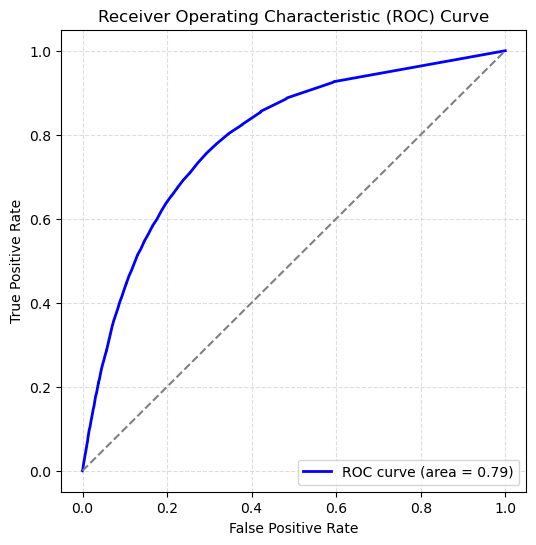

In [21]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=20)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[219297     19]
 [   728  19802]]
    
    AUC: 0.9999303611333352

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00    219316
           1       1.00      0.96      0.98     20530

    accuracy                           1.00    239846
   macro avg       1.00      0.98      0.99    239846
weighted avg       1.00      1.00      1.00    239846

    
TEST METRICS
    Confusion Matrix: 
    [[70576  2530]
 [ 5747  1096]]
    
    AUC: 0.7594893228431837

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.97      0.94     73106
           1       0.30      0.16      0.21      6843

    accuracy                           0.90     79949
   macro avg       0.61      0.56      0.58     79949
weighted avg       0.87      0.90      0.88     79949

    


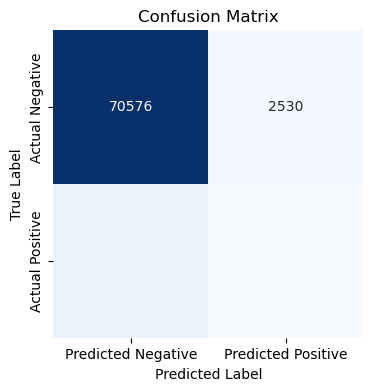

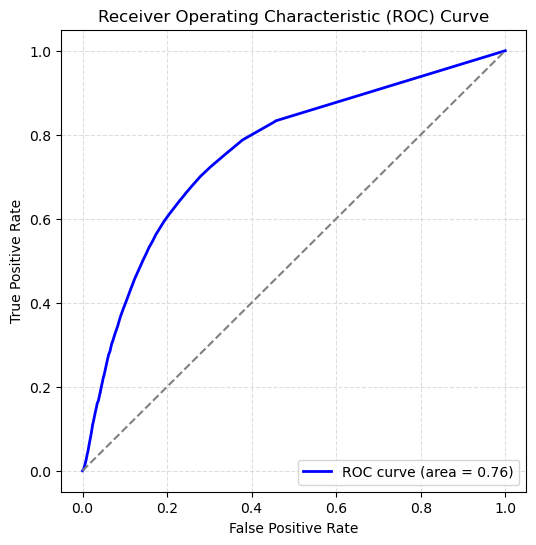

In [22]:
# Step 2: Init the Model
et = ExtraTreesClassifier(random_state=20)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[217013   2303]
 [ 18048   2482]]
    
    AUC: 0.8402441038909292

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.99      0.96    219316
           1       0.52      0.12      0.20     20530

    accuracy                           0.92    239846
   macro avg       0.72      0.56      0.58    239846
weighted avg       0.89      0.92      0.89    239846

    
TEST METRICS
    Confusion Matrix: 
    [[72334   772]
 [ 5982   861]]
    
    AUC: 0.8413167093946756

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.53      0.13      0.20      6843

    accuracy                           0.92     79949
   macro avg       0.73      0.56      0.58     79949
weighted avg       0.89      0.92      0.89     79949

    


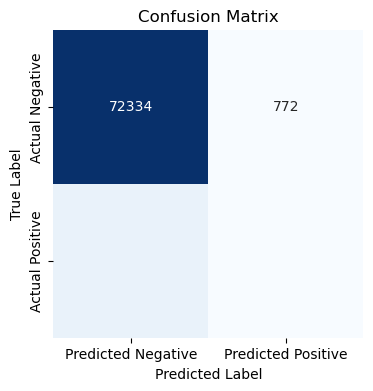

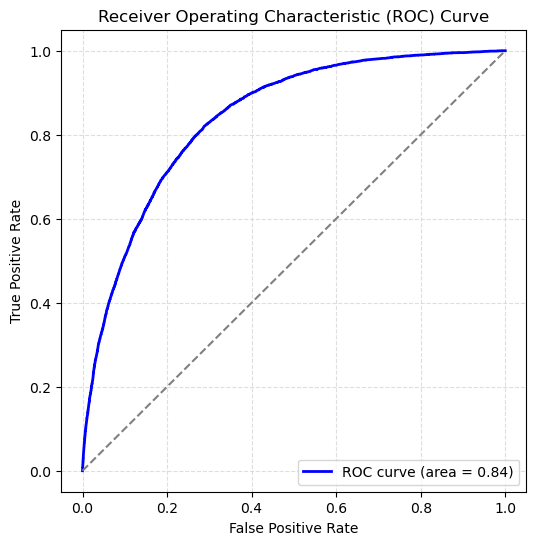

In [23]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=20)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[217926   1390]
 [ 18656   1874]]
    
    AUC: 0.8445860952118261

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.99      0.96    219316
           1       0.57      0.09      0.16     20530

    accuracy                           0.92    239846
   macro avg       0.75      0.54      0.56    239846
weighted avg       0.89      0.92      0.89    239846

    
TEST METRICS
    Confusion Matrix: 
    [[72624   482]
 [ 6212   631]]
    
    AUC: 0.8433759196572624

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.57      0.09      0.16      6843

    accuracy                           0.92     79949
   macro avg       0.74      0.54      0.56     79949
weighted avg       0.89      0.92      0.89     79949

    


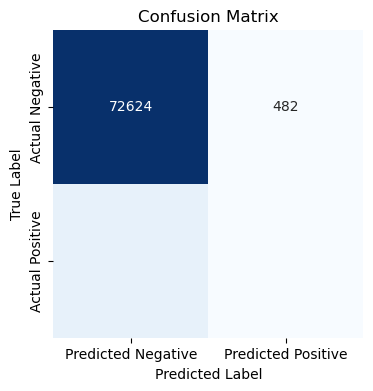

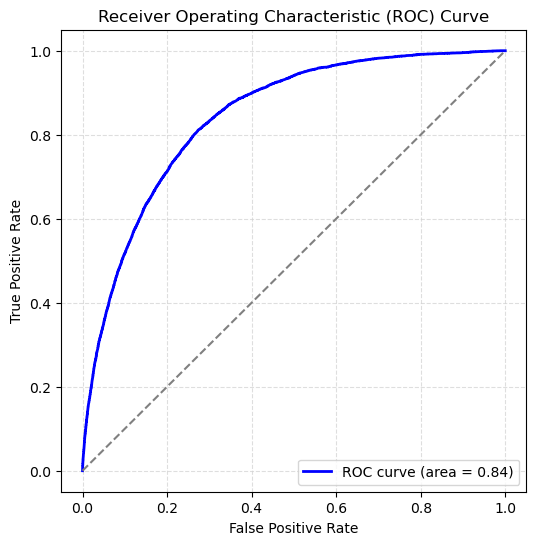

In [24]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=20)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[218199   1117]
 [ 17485   3045]]
    
    AUC: 0.872242078517563

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.99      0.96    219316
           1       0.73      0.15      0.25     20530

    accuracy                           0.92    239846
   macro avg       0.83      0.57      0.60    239846
weighted avg       0.91      0.92      0.90    239846

    
TEST METRICS
    Confusion Matrix: 
    [[72470   636]
 [ 6152   691]]
    
    AUC: 0.8387620480849847

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.52      0.10      0.17      6843

    accuracy                           0.92     79949
   macro avg       0.72      0.55      0.56     79949
weighted avg       0.89      0.92      0.89     79949

    


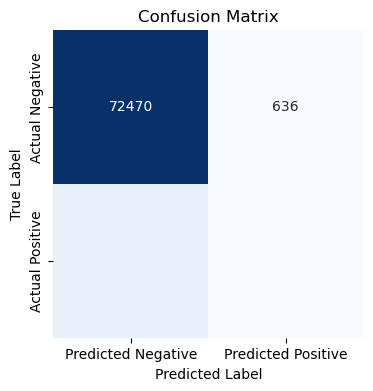

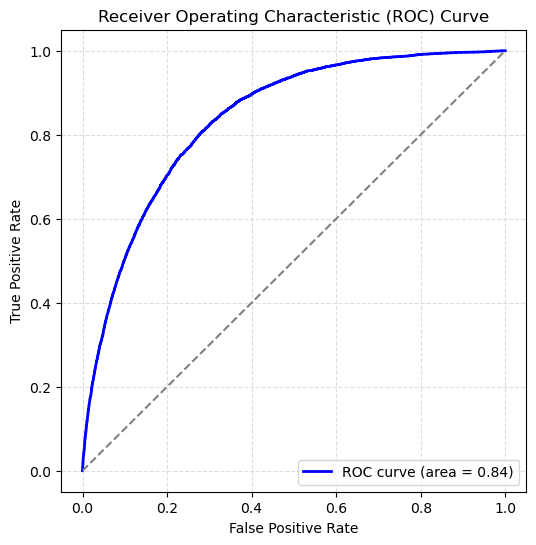

In [25]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=20)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[218221   1095]
 [ 18567   1963]]
    
    AUC: 0.8561388413413435

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      1.00      0.96    219316
           1       0.64      0.10      0.17     20530

    accuracy                           0.92    239846
   macro avg       0.78      0.55      0.56    239846
weighted avg       0.90      0.92      0.89    239846

    
TEST METRICS
    Confusion Matrix: 
    [[72670   436]
 [ 6262   581]]
    
    AUC: 0.8436186743089941

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.57      0.08      0.15      6843

    accuracy                           0.92     79949
   macro avg       0.75      0.54      0.55     79949
weighted avg       0.89      0.92      0.89     79949

    


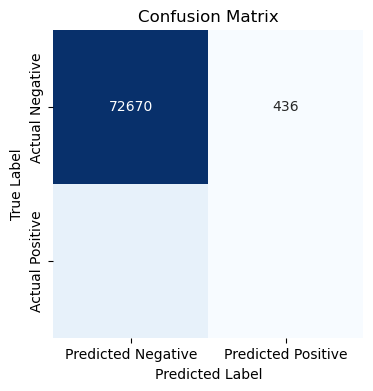

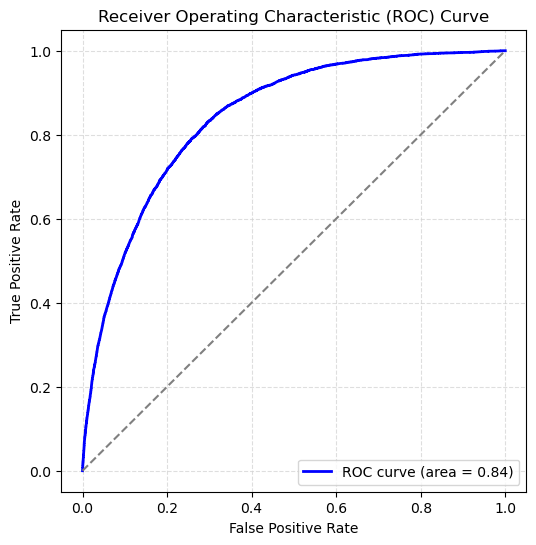

In [26]:
# Step 2: Init the Model
lgbm = LGBMClassifier(random_state=20, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[218806    510]
 [ 19570    960]]
    
    AUC: 0.8726302125964197

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      1.00      0.96    219316
           1       0.65      0.05      0.09     20530

    accuracy                           0.92    239846
   macro avg       0.79      0.52      0.52    239846
weighted avg       0.90      0.92      0.88    239846

    
TEST METRICS
    Confusion Matrix: 
    [[72894   212]
 [ 6598   245]]
    
    AUC: 0.8002981785482306

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      1.00      0.96     73106
           1       0.54      0.04      0.07      6843

    accuracy                           0.91     79949
   macro avg       0.73      0.52      0.51     79949
weighted avg       0.88      0.91      0.88     79949

    


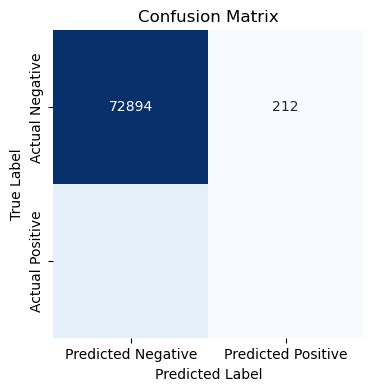

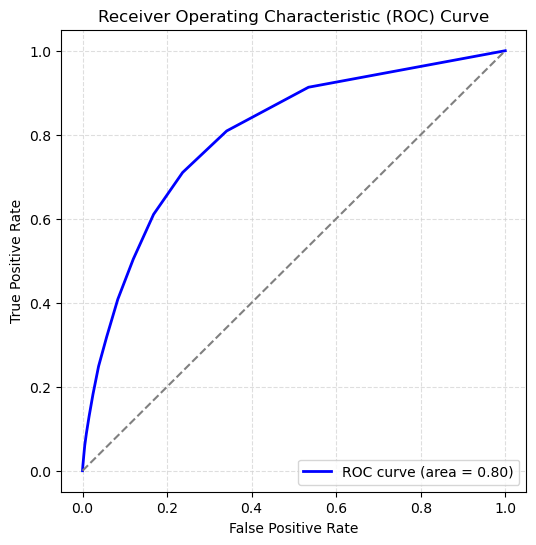

In [28]:
# Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=25)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

In [37]:
importances = dt.feature_importances_
importances_df = pd.DataFrame(sorted(zip(importances, X.columns), reverse=True))
importances_df.columns = ['Feature Importances', 'Feature Names']
importances_df.head()

,Feature Importances,Feature Names
0,0.364189,BMI
1,0.102845,SleepTime
2,0.089303,AgeCategory
3,0.074123,PhysicalHealth
4,0.072801,GenHealth


In [41]:
# Save Scalar
pickle.dump(scaler, open("heart_scaler.h5", 'wb'))

# Save Model
pickle.dump(dt, open("heart_model.h5", 'wb'))